In [140]:
import numpy as np
import math
from matplotlib import pyplot as plt
"""
parameter explain
X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones, we can also call class or labels)
y : 1D array of labels/target value for each traing example. dimension(1 x m)
theta : 1D array of fitting parameters or weights. Dimension (1 x n)
J : Scalar value result of gradient descent 
"""
%matplotlib inline


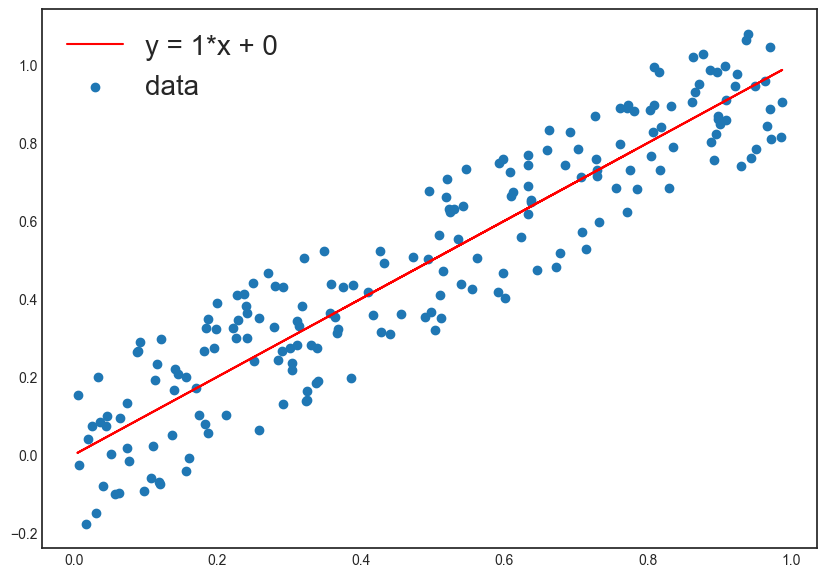

In [162]:
import numpy as np
import matplotlib.pyplot as plt
def make_linear(w=1, b=0.8, size=100, noise=1.0): #w = weight b = bias
    x = np.random.rand(size).reshape(size,1)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = (y + noise).reshape(size,1)

    return x, yy
np.random.seed(42)
# X = np.random.rand(100,1)
# y = 5*((X)**(2)) + np.random.rand(100,1) #5*((X)**(2)) + 
X,y = make_linear(w=1, b=0, size=200, noise=0.2)
# print("X: ",X[:5])
# print("Y: ",y[:5])
w=1
size=200
plt.figure(figsize=(10, 7))
plt.plot(X, w*X, color='r', label=f'y = {w}*x + {b}')
plt.scatter(X, y, label='data')
plt.legend(fontsize=20)
plt.show()


In [111]:
def loss(y, y_hat):
    
    # y --> true/target value.
    # y_hat --> hypothesis
    
    #Calculating loss.
    loss = np.mean((y_hat - y)**2)
    return loss

In [112]:
# Calulating gradient of loss w.r.t parameters(weights and bias).
def gradients(X, y, y_hat,w,gamma=1):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis (predict value)
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*(np.dot(X.T, (y_hat - y))+w*gamma)
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [113]:
def x_transform(X, degrees):
    
    # X --> Input.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # making a copy of X.
    t = X.copy()
    
    # Appending columns of higher degrees to X.
    for i in degrees:
        X = np.append(X, t**i, axis=1)
            
    return X

In [114]:
def train(X, y, bs, degrees, epochs, lr,l2_reg=1):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.
    
    # Adding features to input X.
    x = x_transform(X, degrees)
    
    # m-> number of training examples
    # n-> number of features 
    m, n = x.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    # Reshaping y.
    y = y.reshape(m,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat,w,l2_reg)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [115]:
def predict(X, w, b, degrees):
    
    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    #degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # Adding degrees to input X.
    x1 = x_transform(X, degrees)
    
    # Returning predictions.
    return np.dot(x1, w) + b

[0.11932387807570254, 0.07171078215890753, 0.05891507761895816, 0.054219433209431, 0.05170958343273839]
calculated weights:  [[0.44873418]
 [0.01715293]]


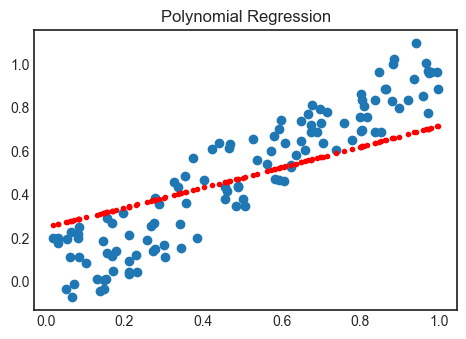

[0.08205349063994476, 0.0582678036488888, 0.05348266344997718, 0.05096160946562559, 0.04906230692177323]
calculated weights:  [[0.4488173 ]
 [0.00366463]]


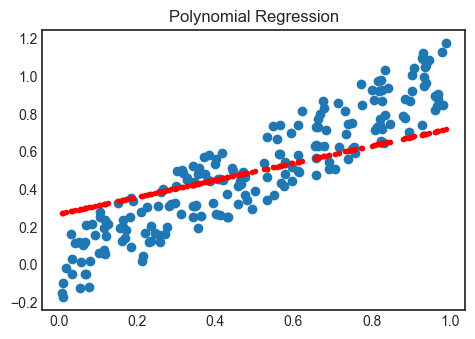

[0.06243205661927024, 0.053270751451999596, 0.05001739930421981, 0.047574996997926326, 0.04566591557394773]
calculated weights:  [[0.4475743 ]
 [0.01276581]]


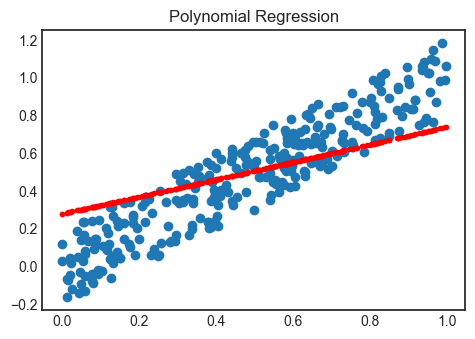

[0.05833626172883447, 0.05135969227759567, 0.04739799839152038, 0.04479205892484844, 0.043044516774408424]
calculated weights:  [[0.46162827]
 [0.00857119]]


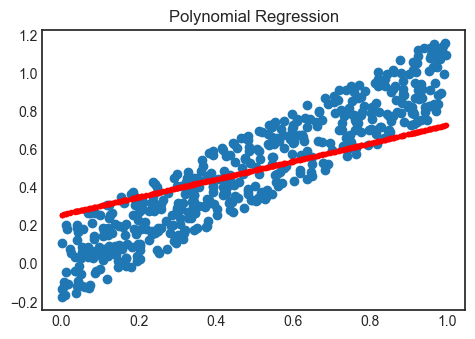

In [164]:
m_list =[120,200,300,500]
X,y = make_linear(w=1, b=0, size=200, noise=0.2)

for i in range(0,4):
    X,y = make_linear(w=1, b=0, size=m_list[i], noise=0.2)
    w, b, l = train(X, y, bs=10, degrees=[200], epochs=100,
                    lr=0.05,l2_reg=1)
    # Plotting
    print(l[:5])
    print("calculated weights: ",w)
    fig = plt.figure(figsize=(12,8))

    plt.subplot(2,2,i+1)
    ypred=predict(X, w, b, [200])
    plt.scatter(X, y)
    plt.plot(X, ypred, 'r.')
    # plt.legend(["Data", "Polynomial predictions"])
    # plt.xlabel('X - Input')
    # plt.ylabel('y - target / true')
    plt.title('Polynomial Regression')
    plt.show()